# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import pandas as pd

df = pd.read_csv("Advertising.csv")

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


видим что в данных нет пропусков, соответственно удалять их не будем

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
X = df[["TV", "radio", "newspaper"]].values
y = df["sales"].values
y = y.reshape((len(y), 1))

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
import numpy as np

np.set_printoptions(formatter={"float": "{0:.5f}".format, "float64": "{0:.5f}".format})

X_norm = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X_norm = X_norm / np.sqrt(np.sum(np.square(X_norm), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [6]:
def coordinate_descent_linear_regression(X, y, max_iters=1000, tol=1e-6):
    """
    Реализует линейную регрессию с методом оптимизации "координатный спуск"

    Параметры:
    X : np.ndarray
        Матрица признаков (размер n x m).
    y : np.ndarray
        Вектор целевых значений (размер n).
    max_iters : int
        Максимальное количество итераций для обучения.
    tol: float
        Пороговое значение точности модели


    Возвращает:
    np.ndarray
        Обновленный вектор весов.
    """
    n_samples, n_features = X.shape
    beta = np.zeros(n_features)
    residual = y.copy()

    # Предварительный расчет X_j^T X_j для всех j
    X_j_squared = np.sum(X**2, axis=0)

    for iteration in range(max_iters):
        beta_old = beta.copy()
        for j in range(n_features):
            # Сохраняем старое значение коэффициента
            beta_j_old = beta[j]

            # Обновляем остатки, добавляя вклад текущего коэффициента
            residual += (X[:, j] * beta[j]).reshape((200, 1))

            # Вычисляем числитель: X_j^T residual
            rho_j = np.dot(X[:, j], residual)
            # Обновляем коэффициент
            beta[j] = rho_j[0] / X_j_squared[j]

            # Обновляем остатки, вычитая новый вклад обновленного коэффициента
            residual -= (X[:, j] * beta[j]).reshape((200, 1))

        # Проверка сходимости
        if np.linalg.norm(beta - beta_old, ord=1) < tol:
            print(f"Алгоритм сошёлся на итерации {iteration}")
            break
    return beta


w = coordinate_descent_linear_regression(X_norm, y)
print("Результат линейной регрессии следующие веса:")
print(f"w_0 = {w[0]:.3f}\nw_1 = {w[1]:.3f}\nw_2 = {w[2]:.3f}\nw_3 = {w[3]:.3f}")

Алгоритм сошёлся на итерации 68
Результат линейной регрессии следующие веса:
w_0 = 41.562
w_1 = 110.131
w_2 = 73.529
w_3 = -0.550


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_norm, y)

print(model.coef_)

[[41.56217 110.13144 73.52861 -0.55006]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [8]:
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

**Добавим единичный столбец**

In [9]:
X_std = np.hstack([np.ones(X_std.shape[0]).reshape(-1, 1), X_std])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [10]:
def mse_error(y, y_hat):
    """
    Среднеквадратическая ошибка
    """
    return np.mean((y - y_hat) ** 2)


def mae_error(y, y_hat):
    """
    Средняя абсолютная ошибка
    """
    return np.mean(np.abs(y - y_hat))

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [11]:
mse_e = mse_error(y, y.mean())
mae_e = mae_error(y, y.mean())
print(f"MSE: {mse_e:.3f}\nMAE: {mae_e:.3f}")

MSE: 27.086
MAE: 4.280


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [12]:
def lin_pred(X, w):
    # простое матричное умножение матрицы параметров на вектор весов
    return X.dot(w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [13]:
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Выполняет один шаг стохастического градиентного спуска.

    Параметры:
    X : np.ndarray
        Матрица признаков (размер n x m).
    y : np.ndarray
        Вектор целевых значений (размер n).
    w : np.ndarray
        Вектор весов модели (размер m).
    train_ind : int
        Индекс объекта обучающей выборки.
    eta : float
        Шаг градиентного спуска.

    Возвращает:
    np.ndarray
        Обновленный вектор весов.
    """
    n = X.shape[0]  # Количество объектов в выборке

    # Предсказание для текущего объекта
    y_pred = lin_pred(X[train_ind], w)

    # Разница между предсказанием и реальным значением
    error = y_pred - y[train_ind]

    # Направление изменения
    grad = (2 / n) * X[train_ind] * error

    # Обновление весов
    w_new = w - eta * grad

    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [14]:
def stochastic_gradient_descent(X, y, w_init, eta=0.01, max_iter=1000, tol=1e-12):
    """
    Реализация стохастического градиентного спуска.

    Аргументы:
    X -- матрица признаков (numpy array), размерностью (n_samples, n_features)
    y -- вектор целевой переменной (numpy array), размерностью (n_samples,)
    w_init -- начальные веса модели (numpy array), размерностью (n_features,)
    eta -- темп обучения (скаляр)
    max_iter -- максимальное количество итераций (целое число)
    tol -- порог Евклидова расстояния для остановки (скаляр)

    Возвращает:
    w -- итоговый вектор весов (numpy array), размерностью (n_features,)
    errors -- np.array [значения MSE, MAE]
    """
    w = w_init.copy()
    errors = []  # Список для сохранения ошибок
    distance = float("inf")  # Инициализация большого значения расстояния
    iteration = 0  # Счетчик итераций

    while distance > tol and iteration < max_iter:
        # while iteration < max_iter:
        # Случайный индекс
        train_ind = np.random.randint(0, len(y))

        # Предсказание текущих весов
        y_pred = lin_pred(X, w)
        mse = mse_error(y, y_pred)
        mae = mae_error(y, y_pred)
        errors.append([mse, mae])  # Сохраняем ошибку

        # Сохраняем старые веса
        w_old = w.copy()

        # Шаг стохастического градиентного спуска
        w = stoch_grad_step(X, y, w, train_ind, eta)

        # Рассчитываем Евклидово расстояние между векторами весов
        distance = np.linalg.norm(w - w_old)

        # Увеличиваем счетчик итераций
        iteration += 1

    return w, np.array(errors)

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [15]:
w_0 = np.random.uniform(-1, 1, 4)
w, errors = stochastic_gradient_descent(X_std, y, w_0, max_iter=10**5)

**Постройте график зависимости ошибки от номера итерации**

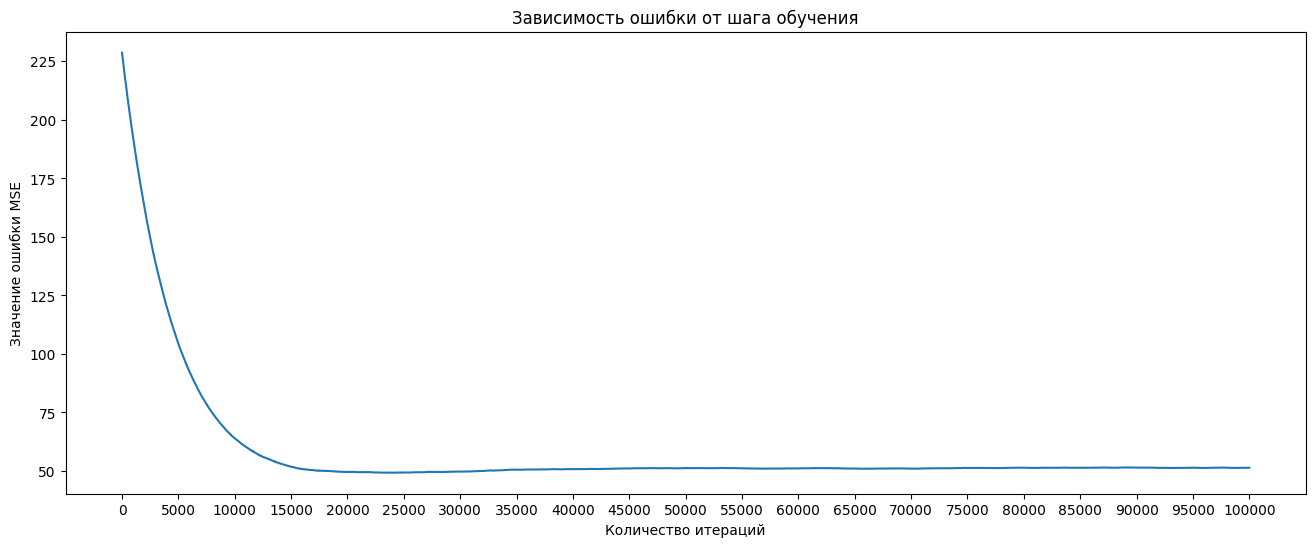

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot([i for i in range(len(errors))], errors[:, 0])
ax.set_title("Зависимость ошибки от шага обучения")
ax.set_ylabel("Значение ошибки MSE")
ax.set_xlabel("Количество итераций")
ax.set_xticks([i for i in range(0, 10**5 + 1, 5000)])
plt.show()

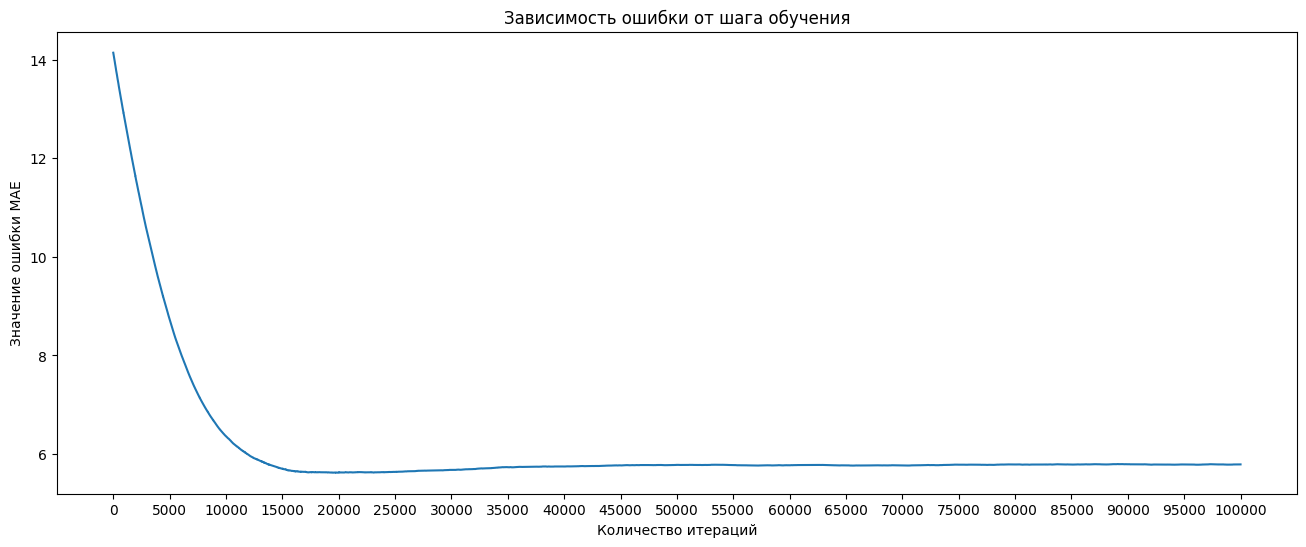

In [17]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot([i for i in range(len(errors))], errors[:, 1])
ax.set_title("Зависимость ошибки от шага обучения")
ax.set_ylabel("Значение ошибки MAE")
ax.set_xlabel("Количество итераций")
ax.set_xticks([i for i in range(0, 10**5 + 1, 5000)])
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [18]:
print("В результате работы алгоритм сошёлся к следующийм весам:")
print(f"w_0 = {w[0]:.3f}\nw_1 = {w[1]:.3f}\nw_2 = {w[2]:.3f}\nw_3 = {w[3]:.3f}")

В результате работы алгоритм сошёлся к следующийм весам:
w_0 = 14.033
w_1 = 3.923
w_2 = 2.784
w_3 = -0.011


**Выведите среднеквадратичную ошибку на последней итерации.**

In [19]:
print("Значение MSE и MAE на последней итерации:")
print(f"MSE = {errors[-1][0]:.3f}")
print(f"MAE = {errors[-1][1]:.3f}")

Значение MSE и MAE на последней итерации:
MSE = 51.400
MAE = 5.789


In [20]:
model = LinearRegression(fit_intercept=False)
model.fit(X_std, y)
etalon_mse = mse_error(model.predict(X_std), y)
print(
    "Значение MSE линейной регрессии с использованием LinearRegression из библиотеки sklearn:"
)
print(f"MSE sklearn = {etalon_mse:.3f}")

Значение MSE линейной регрессии с использованием LinearRegression из библиотеки sklearn:
MSE sklearn = 2.784


# Выводы

## Координатный спуск
Результаты линейной регрессии обученной на реализованном алгоритме с использованием метода координатного спуска почти не отличаются от реализации линейной регресс из библиотеки `sklearn`. На основании чего можно сделать выводы что он реализован корректно.

## Стохастический градиентный спуск
На графиках выше видно, что значения MAE и MSE достаточно резко снижаются вплоть до 20000 итерации обучения. Далее мы видим что значения их начинают расти. Я добавил в функцию линейной регрессии с стохастическим градиентным спуском пороговое значение `tol`, возможно его стоило указать меньшим значением, что бы алгоритм остановился на ранних итерациях, когда значение ошибки не начало возрастать.

Интересным остаётся тот факт, что значение MSE, рассчитанное для данных с усреднением целевого показателя, оказалось ниже. Возможно необходима дальнейшая проработка алгоритма стохастичесского градиентного спуска, разработанного мной, или необходимо подобрать гиперпараметры (например скорость обучения), на которых модель при обучении покажет лучшие результаты.